## Example 1

**x<sup>2</sup> + y<sup>2</sup> + 2x + 2y**

**Minimum Value will be (-1,-1)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
def f(x,y):
  return np.power(x,2)+np.power(y,2)+2*x+2*y

In [3]:
x=np.linspace(-10,10,1000)
y=np.linspace(-10,10,1000)
X, Y = np.meshgrid(x, y)
Z=f(X,Y)

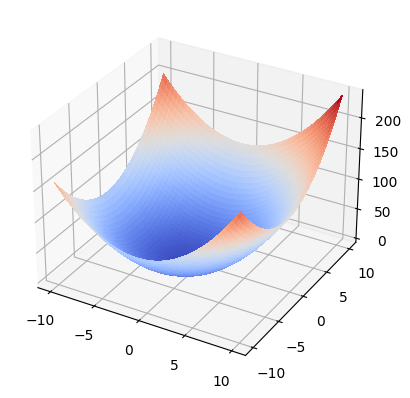

In [4]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)

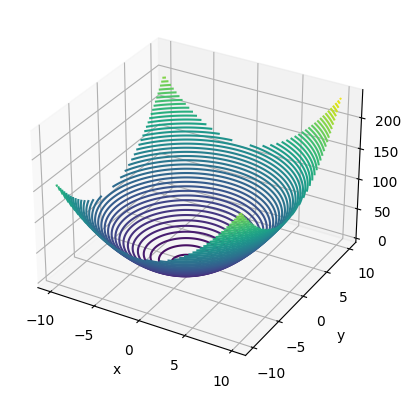

In [5]:
plt.figure()
con=plt.axes(projection='3d')
con.contour3D(X, Y, Z, 50)
con.set_xlabel('x')
con.set_ylabel('y')
con.set_zlabel('z');

In [6]:
 #differentiation w.r.t x & y will be same
def grad(p):
  return 2*p + 2 
def grad_update(x_old,lr):
  x_new = x_old - (lr*grad(x_old))
  return x_new

Converged at 46 Iteration


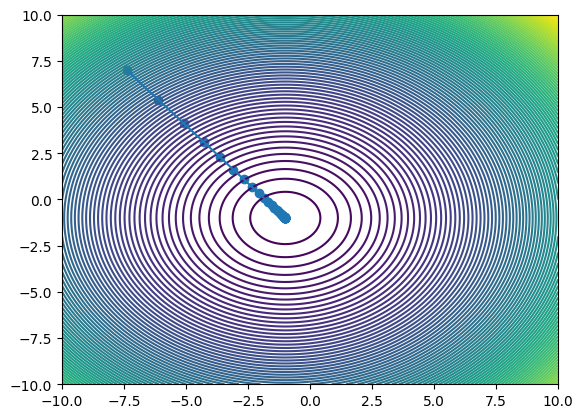

In [7]:
x_init=np.array([-9,9]) #Initialization point  
lr=0.1 
x_old = x_init
x_values = []
plt.figure()
plt.contour(X,Y,Z,100)
for i in list(range(1000)):
    x_new=grad_update(x_old,lr)
    x_values.append(x_new)
    dev=np.linalg.norm(x_new-x_old)
    if dev<=0.0001:
        break
    x_old = x_new
print("Converged at {} Iteration".format(i))
x_values = np.array(x_values)
plt.plot([x_values[0][0],x_values[-1][0]],[x_values[0][1],x_values[-1][1]])
plt.scatter(x_values[:,0],x_values[:,1])

In [8]:
print("Final Values:",x_values[-1])

Final Values: [-1.00022301 -0.99972124]


# Example-2 Application of GD : Linear Regression

In [9]:
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'y')

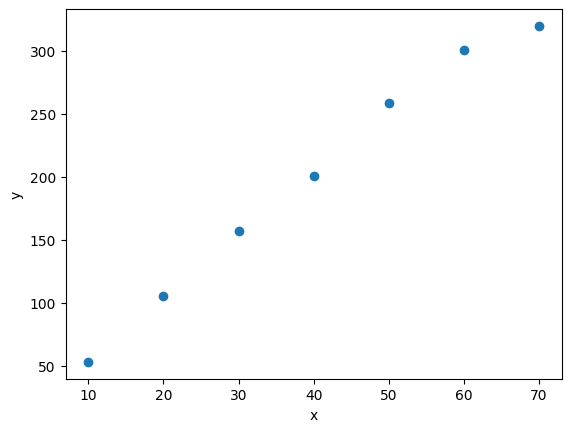

In [10]:
x = np.array([10,20,30,40,50,60,70])
y = np.array([53,105,157,201,259,301,320])
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')

In [11]:
m_init = -10
c_init = -10
lr = 0.01
n=len(X)
iterations = 10000
slope_history=[]
bias_history = []

m_old = m_init
c_old = c_init
for i in range(iterations): 
    Y_pred = m_old*x + c_old  # The current predicted value of Y
    D_m = (-1/n) * sum(x * (y - Y_pred))  # Derivative wrt m
    D_c = (-1/n) * sum(y - Y_pred)  # Derivative wrt c
    m_new = m_old - lr * D_m  # Update m
    c_new = c_old - lr * D_c  # Update c
    slope_history.append(m_new)
    bias_history.append(c_new)
    if m_new - m_old <=0.000001 or c_new - c_old <= 0.000001:
        print("Optimal Weights computed after {} iteration".format(i))
        break
    else:
        m_old =  m_new
        c_old =  c_new

Optimal Weights computed after 83 iteration


Slope :  5.106961797954343
Intercept :  -9.66947439536452


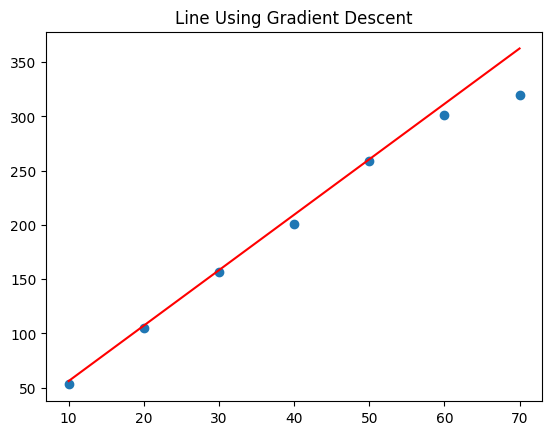

In [12]:
final_slope= slope_history[-1] #last updated value is our optimal value
final_bias = bias_history[-1]
print("Slope : ",final_slope)
print("Intercept : ",final_bias)


Y_pred = final_slope*x + final_slope

plt.scatter(x, y) 
plt.plot(x,Y_pred,color='red')
plt.title("Line Using Gradient Descent")
plt.show()

Text(0, 0.5, 'Cost J(w,c)')

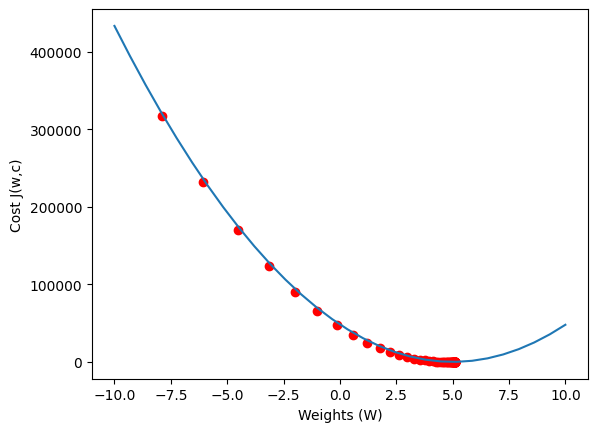

In [13]:
def J(m,c):
    su=0
    for i in range(7): #7 represents number of datapoints in dataset
        error = y[i] - m*x[i]+c
        sq_er = error**2
        su += sq_er
    return su/7 #taking mean 
m=np.linspace(-10,10,30)
c=np.linspace(-10,10,30)
j=[J(mm,cc) for mm,cc in zip(m,c)]
plt.plot(m,j)
plt.scatter(slope_history,[J(mmm,ccc) for mmm,ccc in zip(slope_history,bias_history) ],color='red')
plt.xlabel("Weights (W)")
plt.ylabel("Cost J(w,c)")